# Homework 06: Nonlinear Optimization/Traveling Salesman

MSCA 32013 Optimization and Simulation Methods. University of Chicago.

Group 7. Ben Ossyra, Peter Pezon. Yawen Zhang. 

### Part 1 - 0
Consider the following univariate function: $ 𝑓(𝑥)=3𝑥^2+4𝑥+1 $ . You are tasked with finding the minimum of the function  𝑓  in the interval  [−2,1] .

* Determine the type of optimization problem
* Explain why a minimum exists in this optimization problem. Looking for a concise and precise explanation, but no proof required
* Characterize the local minimum assuming it is an interior point (i.e., first order necessary condition)
* Based on the first order condition above, find the value of  𝑥  that minimizes  𝑓(𝑥)  using simple algebra
* Evaluate  𝑓(𝑋)  at the optimal  𝑥 
* Use Optim in Julia to find the minimum  𝑥 
* Plot the function  𝑓(𝑥)  in the range  [−2,1] .

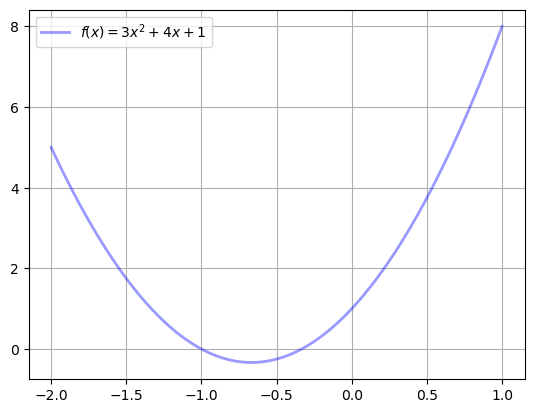

In [6]:
using PyPlot

x1 = collect(-2 : 0.01 : 1)
f1 = 3 .* (x1.^2) + 4 .* x1 .+ 1

fig, ax = subplots()

ax.plot(x1,f1,color="blue",linewidth=2,label=L"f(x) = 3x^2 + 4x + 1",alpha=0.4)
ax.legend(loc="upper left");
ax.grid("on");

### Part 1 - 1

Write a Julia code for 𝑓(𝑥) and 𝐷𝑓(𝑥). Run the Newthon-Raphson method and search for the solution. Prepare a table with values for 𝑥, 𝑓(𝑥), 𝐷𝑓<sup>-1</sup> (𝑥), and 𝑒𝑟𝑟 for each iteration. Explain what is happening during the iterations. Is the algorithm converging? Why or why not? Choose your initial values carefully.

$$ 𝑓1(𝑥_{1},𝑥_{2},𝑥_{3})=𝑥_{1}+𝑥_{2}+𝑥_{3}^2−12 $$  
$$ 𝑓2(𝑥_{1},𝑥_{2},𝑥_{3})=𝑥_{1}^2−𝑥_{2}+𝑥_{3}−2 $$  
$$ 𝑓3(𝑥_{1},𝑥_{2},𝑥_{3})=2𝑥_{1}^2−𝑥_{2}^2+𝑥_{3}−1 $$    

$\frac{\partial f_{1}(x_{n,1},x_{n,2},x_{n,3})}{\partial x_{1}} = 1$  	
$\frac{\partial f_{1}(x_{n,1},x_{n,2},x_{n,3})}{\partial x_{2}} = 1$  
$\frac{\partial f_{1}(x_{n,1},x_{n,2},x_{n,3})}{\partial x_{3}} = 2x_{3}$	

$\frac{\partial f_{2}(x_{n,1},x_{n,2},x_{n,3})}{\partial x_{1}} = 2x_{1}$  	
$\frac{\partial f_{2}(x_{n,1},x_{n,2},x_{n,3})}{\partial x_{2}} = -1$  
$\frac{\partial f_{2}(x_{n,1},x_{n,2},x_{n,3})}{\partial x_{3}} = 1$	

$\frac{\partial f_{3}(x_{n,1},x_{n,2},x_{n,3})}{\partial x_{1}} = 4x_{1}$  	
$\frac{\partial f_{3}(x_{n,1},x_{n,2},x_{n,3})}{\partial x_{2}} = -2x_{2}$  
$\frac{\partial f_{3}(x_{n,1},x_{n,2},x_{n,3})}{\partial x_{3}} = 1$



In [66]:
using DataFrames

tol = 10.0^(-10)
err = 10.0^5
x0 = [1.0; 1.0; 1.0]

x = copy(x0)

function g1(x)
    [x[1]+x[2]+x[3]^2-12; x[1]^2-x[2]+x[3]-2; 2*x[1]^2-x[2]^2+x[3]-1]
end

function Dg1(x)
    [1 1 2*x[3];
    2*x[1] -1 1;
    4*x[1] -2*x[2] 1]
end

k = 0
resual = DataFrame(k=NaN,x=NaN,f=NaN,invDf1=NaN,invDf2=NaN,invDf3=NaN,inverr=NaN)


while err>tol
    x = x0 - inv(Dg1(x0))*g1(x0)
    err = maximum(abs.(x-x0))
    if k==0
#        resual = DataFrame(k=[k;k],x=x0,f=g1(x0),invDg1=inv(Dg1(x0))[:,1],invDf2=inv(Dg1(x0))[:,1],err=x-x0)
        resual = DataFrame(k=k,x=x0[1,1,1],f=g1(x0)[1,1,1],invDf1=inv(Dg1(x0))[1,1],invDf2=inv(Dg1(x0))[1,2],
            invDf3=inv(Dg1(x0))[1,3], err=x[1,1]-x0[1,1])
        push!(resual, ([k,x0[2,1],g1(x0)[2,1],inv(Dg1(x0))[2,1],inv(Dg1(x0))[2,2],inv(Dg1(x0))[2,3],x[2,1]-x0[2,1]]))
        push!(resual, ([k,x0[3,1],g1(x0)[3,1],inv(Dg1(x0))[3,1],inv(Dg1(x0))[3,2],inv(Dg1(x0))[3,3],x[3,1]-x0[3,1]]))
    else
#        push!(resual, @data([[k,k] x0 f(x0) inv(Df(x0)) x-x0]))
        push!(resual, ([k,x0[1,1],g1(x0)[1,1],inv(Dg1(x0))[1,1],inv(Dg1(x0))[1,2],inv(Dg1(x0))[1,3],x[1,1]-x0[1,1]]))
        push!(resual, ([k,x0[2,1],g1(x0)[2,1],inv(Dg1(x0))[2,1],inv(Dg1(x0))[2,2],inv(Dg1(x0))[2,3],x[2,1]-x0[2,1]]))
        push!(resual, ([k,x0[3,1],g1(x0)[3,1],inv(Dg1(x0))[3,1],inv(Dg1(x0))[3,2],inv(Dg1(x0))[3,3],x[3,1]-x0[3,1]]))
    end
    x0 = x
    k = k + 1
end
resual

Row,k,x,f,invDf1,invDf2,invDf3,err
,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,0,1.0,-9.0,0.333333,-1.66667,1.0,0.333333
2,0,1.0,-1.0,0.666667,-2.33333,1.0,2.66667
3,0,1.0,1.0,0.0,2.0,-1.0,3.0
4,1,1.33333,9.0,-0.0604454,0.569459,-0.0858961,-0.110993
5,1,3.66667,0.111111,-0.0254507,0.397667,-0.194062,-1.152
6,1,4.0,-6.88889,0.135737,-0.120891,0.0349947,-0.967126
7,2,1.22234,0.935333,-0.104801,0.819474,-0.183777,-0.151433
8,2,2.51467,0.0123195,-0.0635849,0.745371,-0.359681,-0.418179
9,2,3.03287,-1.30246,0.19262,-0.25798,0.0895944,-0.0602929


### Part 1 - 2

Derive the analytical version of the Newton-Raphson algorithm (including  𝑓(𝑥)  and  𝑓′(𝑥) ) for each expression below (separately). For each expression below, implement the Newton-Raphson algorithm, and find at least one root for each non-linear function below. Also plot  𝑓(𝑥)  around the solution(s). Prepare a data table with values for  𝑥 ,  𝑓(𝑥) ,  𝑓′(𝑥) , and  𝑒𝑟𝑟  for each iteration.

* $ 3𝑥^2−2𝑥−4=0 $  
* $ 𝑥−𝑒^{-x^2}=0 $    
* $ 𝑒^𝑥−𝑥^4=0 $